# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sinasc_RO_2019.csv')

df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [47]:
df['APGAR5_Categorizado'] = df['APGAR5'].map(lambda valor: 'normal' 
                                                            if valor >= 8 
                                                            else ('asfixia leve' 
                                                                if 6 <= valor <= 7 
                                                                    else ('asfixia moderada' 
                                                                    if 4 <= valor <= 5 
                                                                    else 'asfixia grave'
                                                                        )
                                                                    )
                                                            )

df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,APGAR5_Categorizado
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [49]:
print(df['GESTACAO'].unique())

['37 a 41 semanas' '42 semanas e mais' '32 a 36 semanas' '22 a 27 semanas'
 '28 a 31 semanas' nan 'Menos de 22 semanas']


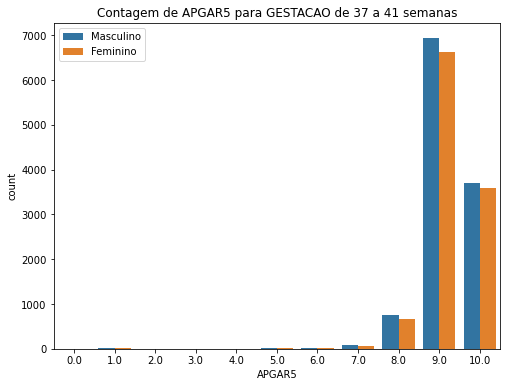

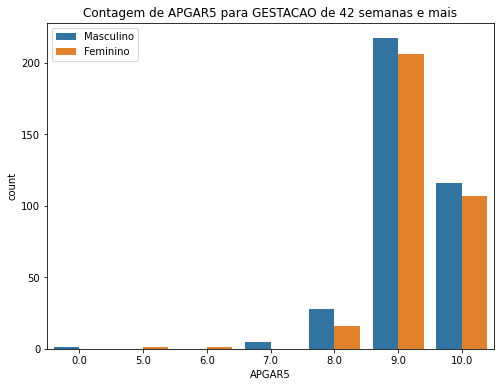

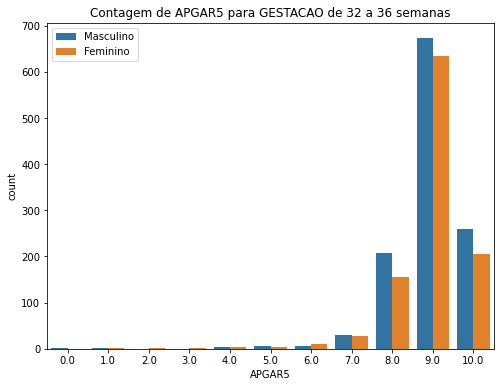

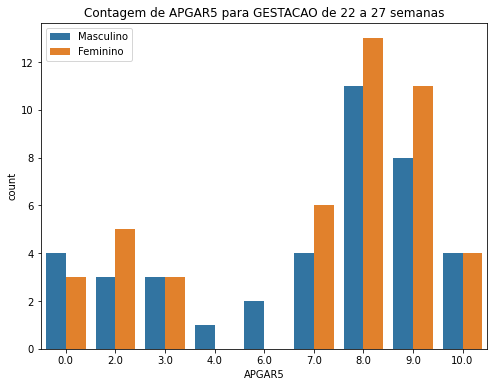

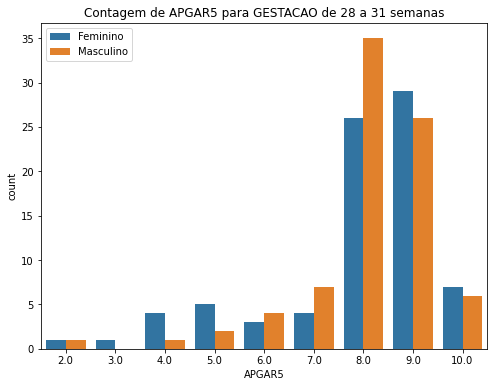

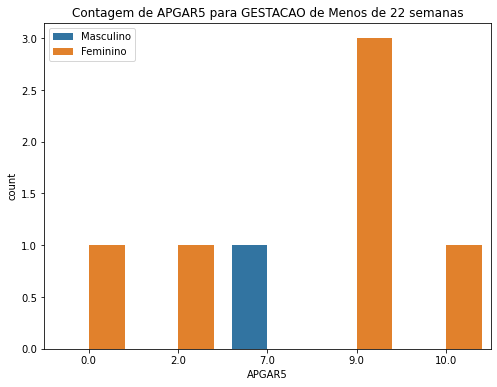

In [67]:
#Fazendo tratamentos na base antes de continuar o exercício:

df = df.dropna(subset=['GESTACAO'])

gestacao_tipos = df['GESTACAO'].unique()


for gestacao in gestacao_tipos:
    
    df_filtrado = df[df['GESTACAO'] == gestacao]

    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_filtrado, x='APGAR5', hue='SEXO')
    
    plt.title(f'Contagem de APGAR5 para GESTACAO de {gestacao}')
    plt.legend(loc='upper left')
    
    plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [51]:
#Curiosamente já tinha feito anteriormente para visualizar melhor os dados antes da geração dos gráficos
tabela = pd.crosstab(df['GESTACAO'], df['APGAR5'])

print(tabela)

APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [52]:
percentuais_linha = tabela.apply(lambda x: x / x.sum(), axis=1)
percentuais_linha = percentuais_linha.round(2)

print(percentuais_linha)

APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas      0.08   0.0  0.09  0.07  0.01  0.00  0.02  0.12  0.28   
28 a 31 semanas      0.00   0.0  0.01  0.01  0.03  0.04  0.04  0.07  0.38   
32 a 36 semanas      0.00   0.0  0.00  0.00  0.00  0.00  0.01  0.03  0.16   
37 a 41 semanas      0.00   0.0  0.00  0.00  0.00  0.00  0.00  0.01  0.06   
42 semanas e mais    0.00   0.0  0.00  0.00  0.00  0.00  0.00  0.01  0.06   
Menos de 22 semanas  0.14   0.0  0.14  0.00  0.00  0.00  0.00  0.14  0.00   

APGAR5               9.0   10.0  
GESTACAO                         
22 a 27 semanas      0.22  0.09  
28 a 31 semanas      0.34  0.08  
32 a 36 semanas      0.59  0.21  
37 a 41 semanas      0.60  0.32  
42 semanas e mais    0.61  0.32  
Menos de 22 semanas  0.43  0.14  


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

2507 25796
APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5               9.0   10.0  
GESTACAO                         
22 a 27 semanas        19     8  
28 a 31 semanas        55    13  
32 a 36 semanas      1307   465  
Menos de 22 semanas     3     1  


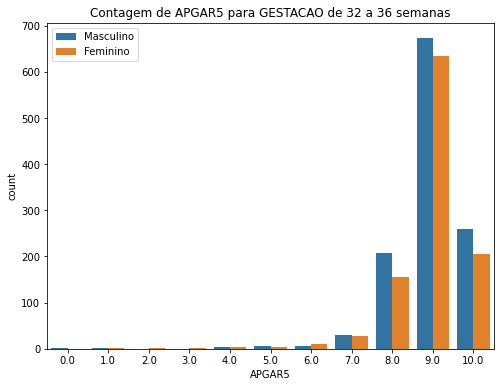

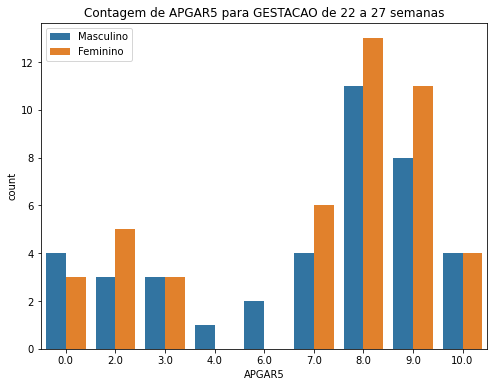

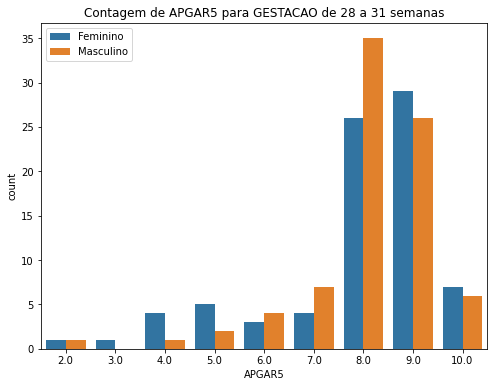

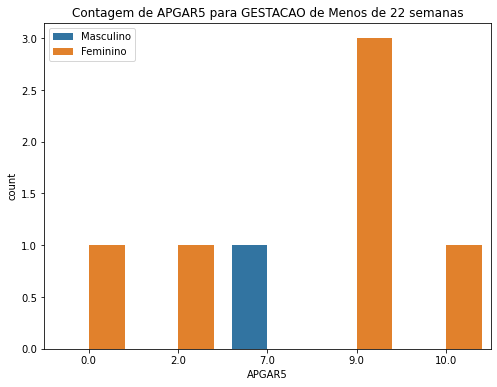

In [68]:
prematuro = ['32 a 36 semanas','22 a 27 semanas', '28 a 31 semanas', 'Menos de 22 semanas']

df_prematuro = df[df['GESTACAO'].isin(prematuro)]

print(len(df_prematuro['GESTACAO']),len(df['GESTACAO']))

tabela_prematuro = pd.crosstab(df_prematuro['GESTACAO'], df_prematuro['APGAR5'])

print(tabela_prematuro)

for gestacao in prematuro:
    
    df_filtrado = df_prematuro[df_prematuro['GESTACAO'] == gestacao]

    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_filtrado, x='APGAR5', hue='SEXO')
    
    plt.title(f'Contagem de APGAR5 para GESTACAO de {gestacao}')
    plt.legend(loc='upper left')
    
    plt.show()

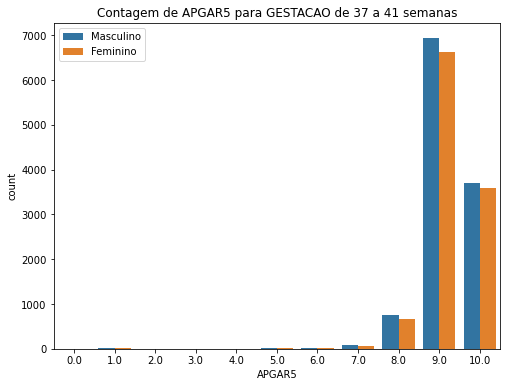

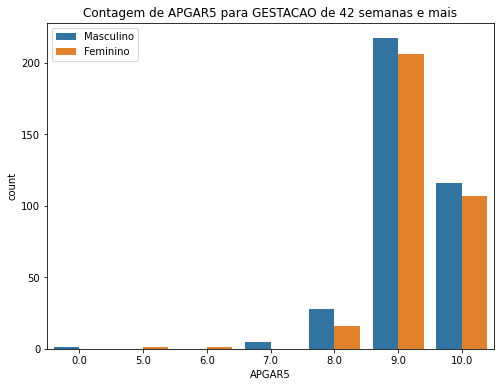

In [69]:
gestacao_boa = ['37 a 41 semanas','42 semanas e mais']

for gestacao in gestacao_boa:
    df_filtrado = df[df['GESTACAO'] == gestacao]
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_filtrado, x='APGAR5', hue='SEXO')
    plt.title(f'Contagem de APGAR5 para GESTACAO de {gestacao}')
    plt.legend(loc='upper left')
    
    plt.show()

In [55]:
media_apgar5_por_gestacao = df.groupby('GESTACAO')['APGAR5'].mean()

print(media_apgar5_por_gestacao)

GESTACAO
22 a 27 semanas        6.623529
28 a 31 semanas        7.987654
32 a 36 semanas        8.908684
37 a 41 semanas        9.224437
42 semanas e mais      9.219198
Menos de 22 semanas    6.571429
Name: APGAR5, dtype: float64


In [70]:
# De fato foi possível observar que nas gestações consideradas 'prematuras' há uma maior incidência em notas mais baixas do APGAR5, indicando problemas de asfixia nos bebês que nascem prematuramente,
# principalmente nas faixas de até 22 semanas e entre 22 e 27 semanas.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

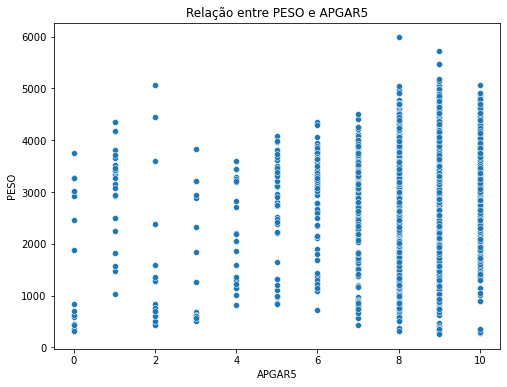

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='APGAR5', y='PESO')

# Adicionar título e rótulos aos eixos
plt.title('Relação entre PESO e APGAR5')
plt.xlabel('APGAR5')
plt.ylabel('PESO')

# Exibir o gráfico
plt.show()

# Nesta primeira tentativa, ficou ruim de visualizar de fato se há uma relação entre o Peso e o APGAR5. Por isso, vamos tentar novamente categorizando o Peso, dividindo-o em faixas.

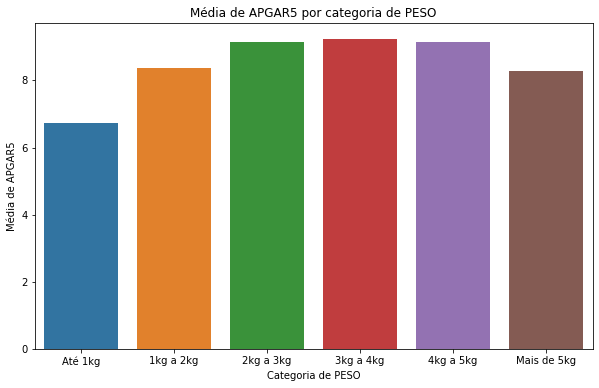

In [72]:
# Categorizando o PESO em faixas
faixas = [0, 1000, 2000, 3000, 4000, 5000, float('inf')]
legenda = ['Até 1kg', '1kg a 2kg', '2kg a 3kg', '3kg a 4kg', '4kg a 5kg', 'Mais de 5kg']

df['categoria_peso'] = pd.cut(df['PESO'], bins=faixas, labels=legenda, right=False)

# Criar um gráfico de barras para visualizar a relação entre as categorias de peso e o APGAR5
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='categoria_peso', y='APGAR5', ci=None)
plt.title('Média de APGAR5 por categoria de PESO')
plt.xlabel('Categoria de PESO')
plt.ylabel('Média de APGAR5')

plt.show()

In [73]:
media_apgar5_por_peso = df.groupby('categoria_peso')['APGAR5'].mean()

print(media_apgar5_por_peso)

categoria_peso
Até 1kg        6.736842
1kg a 2kg      8.370297
2kg a 3kg      9.141403
3kg a 4kg      9.236911
4kg a 5kg      9.146649
Mais de 5kg    8.272727
Name: APGAR5, dtype: float64


In [66]:
# Categorizando as faixas de peso, é possível perceber que os bebês com até 1kg, possuem uma média significativamente mais baixa do que os demais, com o valor da média já sendo enquadrado na faixa de asfixia leve.
# Além disso, os bebês na faixa de 1kg a 2kg e acima de 5kg também possuem notas um pouco mais baixas, porém ainda estão com uma classificação considerada como 'normal'.
# A faixa de peso que apresentou as melhores notas foi a de 3kg a 4kg.